# Grade: /100 Marks

# Assignment 02: Maximum Likelihood

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

### Maximum Likelihood

The [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) is a continuous probability distribution often used to predict time when an event might ocurr, for instance Earthquake.

If we know $y$ is influenced by feature $x$, then we can use the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X=x$.

### Global Toolbox

In [2]:
# Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as so
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.display import display

### Question 1: /2 Marks

The negative log likelihood for a exponential random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(\ln(\lambda) - \lambda y_i \Bigg)$$

Here, $\mathbf{y}=(y_i) \in \mathbb{R^N}$ is a vector  and $\lambda$ is a scalar value.

Define a function called `exponentialNegLogLikelihood` that takes a vector  $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.

Test your function by calling it with `lamb = 2` and `y = np.array([1, 4, 6, 15])`. It should yield a value about 49.23.

Test your function by calling it with `lamb = np.array([1, 0.5, 8, 5])` and  `y = np.array([1.5, 0.8, 5.5, 4])`. It should yield a value about 62.90.

FYI: The domain of logarithmic function of $\lambda$ is $\lambda > 0$.

In [3]:
# Write the function
def exponentialNegLogLikelihood(lamb, y):
  negLogLikelihood = - np.sum(np.log(lamb) - (lamb * y))

  return negLogLikelihood

# Testing
lamb = 2
y = np.array([1, 4, 6, 15])
testA = exponentialNegLogLikelihood(lamb, y)
print(testA) # Output: 49.23

lamb = np.array([1, 0.5, 8, 5])
y = np.array([1.5, 0.8, 5.5, 4])
testB = exponentialNegLogLikelihood(lamb, y)
print(testB) # Output: 62.90

# 2 pts

49.227411277760226
62.90426772644601


---

### Question 2: /3 Marks

Write a function called `exponentialRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ , a design matrix $\mathbf{X}$ of features, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent, and exponentially distributed with $\lambda=\exp(-\mathbf{X}\beta)$.

Test your function by calling it with
* `b = np.array([2, 1])`
* `X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T`
* `y = np.array([1, 2.5, 12])`

It should yield a value about 15.24.

In [4]:
# Write the function
def exponentialRegressionNegLogLikelihood(b, X, y):
  lamb = np.exp(- np.dot(X, b))
  negativeLogLikelihood = exponentialNegLogLikelihood(lamb, y)
  return negativeLogLikelihood

# Test
b = np.array([2, 1])
X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T
y = np.array([1, 2.5, 12])
test = exponentialRegressionNegLogLikelihood(b, X, y)
print(test) # Output: 15.24

# 3 pts

15.23757690453085


---
### Question 3: /2 Marks

Answer the questions:

1. In `exponentialRegressionNegLogLikelihood`, what problem can happen if we assume that $\lambda = \mathbf{X}\beta$?. [1 pts]


2. What property of the exponential distribution is guaranteed when we assume that $\lambda$ has the form of $\exp(-\mathbf{X}\beta)$? [1 pts]


**Written Answer:**
1. The original equation, $\lambda=\exp(-\mathbf{X}\beta)$, will always produce a positive value for lambda. If we assume that $\lambda = \mathbf{X}\beta$,

2.


---
### Question 4: /2 Marks

Write a function called `Model_predict` whose arguments are a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$, and its outputs are predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$.

Test your function by calling it with
* `b = np.array([2, 1])`
* `X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T`

It should yield an array with elements being about 148.4, 244.7, 99.5.

In [5]:
# Write the function
def Model_predict(b, X):
  y = np.exp(np.dot(X, b))
  return y

# Test
b = np.array([2, 1])
X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T
test = Model_predict(b, X)
print(test) # Output: 148.4, 244.7, 99.5

# 2 pts

[148.4131591  244.69193226  99.48431564]


---
### Question 5: /7 Marks

Write a function called `Model_fit` which accepts as its first argument a design matrix $\mathbf{X}$ and as its second argument a vector of $\mathbf{y}$. Its output should be the maximum likelihood estimates for the coefficients of exponential regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with
* `X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T`
* `y = np.array([0, 2.5, 10])`

Print the estimated coefficient $b$.

In [6]:
# Write the function
def Model_fit(X, y):
    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    nrows, ncols = X.shape
    beta_start = np.zeros(ncols)

    # Minimize the appropriate likelihood function
    mle = so.minimize(exponentialRegressionNegLogLikelihood, beta_start, args=(X, y))

    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

# 5 pts

In [7]:
# Test the function and print estimated b
X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T
y = np.array([0, 2.5, 10])

result = Model_fit(X, y)
print(result)

# 2 pts

[-0.28141822  0.71208028]


---
### Question 6: /12 Mark(s)

Use the data `exponential_regression.csv`, where $y$ represents time units to fit a exponential regression using the functions that you already have created.

* Use your function to estimate the coefficients.
* Use `mean_squared_error` to calculate the regression error.
* Plot a scatterplot of the data as well as the regression curve (plot with the range over $x \in [-2.15, 2.15]$).


In [8]:
# Load the data
# Notice that this file is separated by semicolon (Hint: specify "sep=")
data = pd.read_csv("exponential_regression.csv", sep=";")

# 1 pts

# Get the x and y. Create the design matrix X
x = data["x"]
y = data["y"]
X = np.c_[np.ones(x.size), x]

# 2 pts
# Find the maximum likelihood estimates for the coefficients
betas = Model_fit(X, y)
print(f'The estimated coefficients are :{betas}')
# 2 pts

The estimated coefficients are :[ 0.07120227 -1.75117875]


In [9]:
# Calculate the mean squared error
predY = Model_predict(betas, X)
res = y - predY
mse = np.mean(res**2)
print(f"The mean of sqaured error is {mse}")
# 2 pts

The mean of sqaured error is 3.3686616145370336


In [10]:
# Generate new data for plotting regression curve
x_new = np.linspace(-2.15, 2.15, 100)
X_new = np.c_[np.ones(x_new.size), x_new]

# Make predictions on the new data
y_pred = Model_predict(betas, X_new)

# 3 pts

Text(0, 0.5, 'Y')

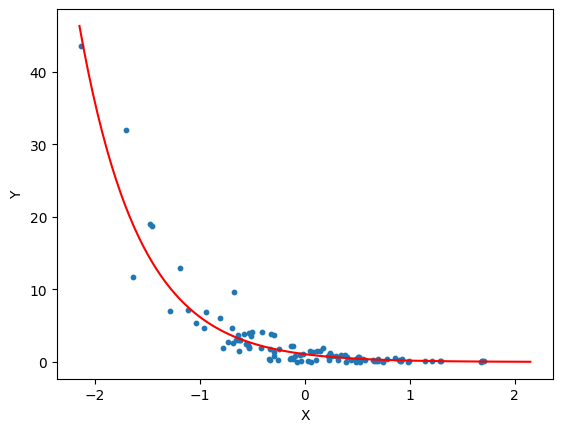

In [11]:
# Make the plot
plt.scatter(x, y, 10)
plt.plot(x_new, y_pred, color="red")
plt.xlabel("X")
plt.ylabel("Y")

# 2 pts

---
### Question 7:  /14 Marks

* Fit a linear regression (ordinary least squares) to the data using [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from `sklearn` and obtain parameter estimates.
* Use `mean_squared_error` to calculate the regression error.
* Plot the regression line over the same range.



In [12]:
# Fit the linear regression model
lr = LinearRegression()
lr.fit(X, y)

betas_linear = lr.coef_
print(f'The estimated coefficients using linear regression are {betas_linear}')
# 4 pts

# Calculate the mean squared error
predY = lr.predict(X)
mse_linear = mean_squared_error(y, predY)
print(f"The mean of sqaured error is {mse_linear}")

# 4 pts

The estimated coefficients using linear regression are [ 0.         -5.11409159]
The mean of sqaured error is 20.804808321384726


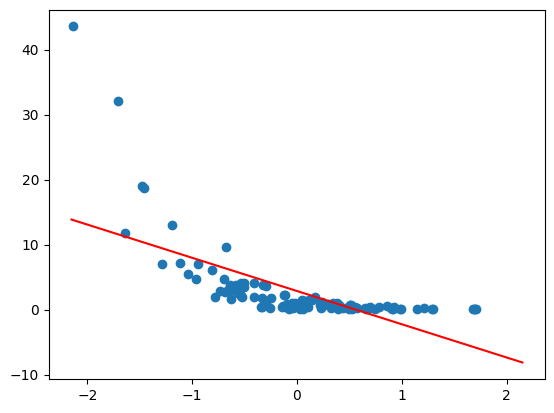

In [13]:
# Make predictions on the new data
predY_new = lr.predict(X_new)

# 2 pts

# Make the plot
plt.scatter(x, y)
plt.plot(x_new, predY_new, color="red")

# 4 pts

---
### Question 8:  /16 Marks

* Fit a linear regression (ordinary least squares) to the data with a square term, and obtain parameter estimates.
* Use `mean_squared_error` to calculate the regression error.
* Plot the predictions over the same range.

Note that in this case the design matrix X should look like

$X =[[1,x_1,x_1^2],[1,x_2,x_2^2],...]$

In [14]:
# Create new design matrix and fit the linear regression model



betas_sq =
print(f'The estimated coefficients using multiple linear regression are {betas_sq}')
# 6 pts

# Calculate the mean squared error


mse_sq =
print(f"The mean of sqaured error is {mse_sq}")
# 4 pts

SyntaxError: invalid syntax (3783325504.py, line 5)

In [ ]:
# Make predictions on the new data


# 2 pts

# Make the plot


# 4 pts

---
### Question 9: /2 Marks

Among the three models, which one would you select? What is the major problem using linear regression? Just a reminder that in this case $y$ is measured in time units.

**Written Answer**


---
### Question 10: /20 Marks

We wish to do an experiment to determine if ants search for food using a random search or directed search method. To help design the experiment we first will run some simulations. In the experiment, ants are placed inside a 50 mm $\times$ 50 mm box. They cannot climb the wall, but can escape through an opening of size 5 mm in the wall. Repeated measurements of how far an ant travels in 1 second show an average speed of 2 mm per second. Our simulation needs to determine the probability that an ant escapes the box in 600 seconds (hint: so your main iteration would look like `for t in range(600):`) if their motion is indeed random. Assume the ant is always initially placed in the center of the box and simulate a simple random walk in 2D on discrete time in this fashion: Have the ant live on a discrete lattice. The ant takes 2 mm to the left if a random number $u$ satisfies $u < 0.25$. The ant moves 2 mm to the right if $0.25 \leq u < 0.5$, the ant moves 2 mm up if $0.5 \leq u < 0.75$, and 2 mm down if $0.75 \leq u \leq 1.0$. $u$ is distributed uniformly between 0 and 1 (hint: use `np.random.uniform(low=0, high=1)` to generate it). If a step would take the ant into a wall, repeat the step until it is successful (result is still one time-step). With `attempts = np.linspace(10, 1000, 19)`, run your main iteration under the loop `for M in attempts:` and construct a dataframe (called "ant") with columns for number of attempts (i.e. `M`), number of escapes, and probability of escape for every `M`. Your dataframe would eventually look something like this with 19 rows and real values:

attempts | escapes| probability
---|---|---
10|x1|y1
65|x2|y2
...|...|...
1000|x19|y19

In [15]:
attempts = np.linspace(10, 1000, 19)

x    = 50       # box size in x-direction
y    = 50       # box size in y-direction
time = 600      # in seconds

initialPosition = [x/2, y/2]
exits = [[40, 11], [41, 11], [42, 11], [43, 14], [44, 11]]

ant = pd.DataFrame(columns=["attempts", "escapes", "probability"])
trajectory = []

for M in attempts:
  escapes = 0

  for n in range(int(M)):
    position = initialPosition
    trajectory = [position.copy()]

    for t in range(time):
      u = np.random.uniform(low=0, high=1)

      if (u < 0.25) and ((position[0] - 2) >= 0):
        # Move 2mm left
        position[0] -= 2

      elif (u < 0.5) and ((position[0] + 2) <= x):
        # Move 2mm right
        position[0] += 2

      elif (u < 0.75) and ((position[1] + 2) <= y):
        # Move 2mm up
        position[1] += 2

      else:
        if ((position[1] - 2) >= 0):
          # Move 2mm down
          position[1] -= 2

      trajectory.append(position.copy())

      # Check if exit
      if position in exits:
        escapes += 1
        break

  # Calculate probability
  probability = escapes / M
  ant = pd.concat([ant, pd.DataFrame({'attempts': M, 'escapes': escapes,
                                      'probability': [probability]})], ignore_index=True)

display(ant.head())
display(ant.tail())

,attempts,escapes,probability
0,10.0,5,0.500000
1,65.0,20,0.307692
2,120.0,33,0.275000
3,175.0,78,0.445714
4,230.0,99,0.430435


,attempts,escapes,probability
14,780.0,314,0.402564
15,835.0,328,0.392814
16,890.0,371,0.416854
17,945.0,394,0.416931
18,1000.0,399,0.399000


---
### Question 11: /5 Marks

Plot the trajectory of the ant in the last escape event.

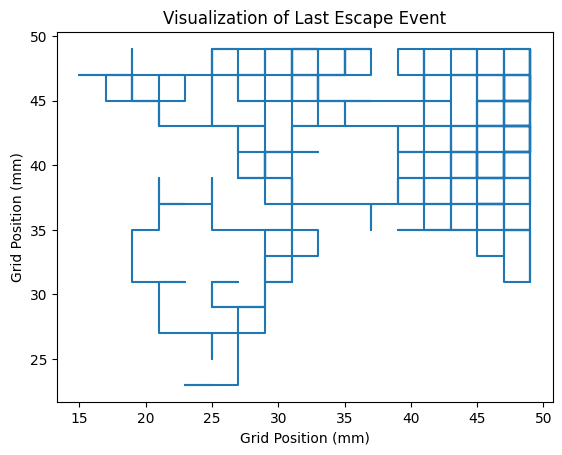

In [ ]:
# Let's visualize the last escape event
x = [pos[0] for pos in trajectory]
y = [pos[1] for pos in trajectory]
plt.plot(x, y)
plt.title("Visualization of Last Escape Event")
plt.xlabel("Grid Position (mm)")
plt.ylabel("Grid Position (mm)")

plt.show()

---
### Question 12: /5 Mark(s)
Explore the "ant" dataframe. Do you see any trend in probability? What value for probability would you report if you are asked what is the probability of the escape event?

In [ ]:
print(ant.describe())

print("The mean probability is", ant["probability"].mean())

display(ant.tail())

          attempts  probability
count    19.000000    19.000000
mean    505.000000     0.388798
std     309.502289     0.087164
min      10.000000     0.100000
25%     257.500000     0.366055
50%     505.000000     0.406000
75%     752.500000     0.427580
max    1000.000000     0.520588
The mean probability is 0.3887982310923987


,attempts,escapes,probability
14,780.0,311,0.398718
15,835.0,307,0.367665
16,890.0,370,0.415730
17,945.0,420,0.444444
18,1000.0,406,0.406000


#### Written Answer:
The probability starts off variable. Having run the simulation multiple times, for the first 10 attempts, I have seen probabilities as low as 0 and as high as 0.80. As the number of attempts increase, the probability becomes more stable, usually falling in the high 0.30 to low 0.40 range. If I had to report the probability of the escape event, I would use the mean probability because takes an average of all the attempts, making it more representative of the probability rather than just taking one value.

---
### Question 13: /5 Mark(s)
Now scatter plot `attempts` versus `escapes` and use what you have learned so far to apply linear regression (ordinary least squares) to the data, and plot the predictions over the same range. Report your fit coefficients and compare them against your answer to the previous question and report what you witness and explain why?

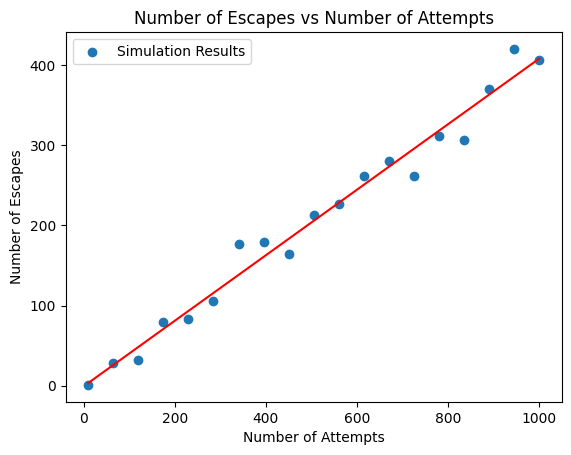

In [ ]:
fig, ax = plt.subplots(dpi = 100)
attempts = np.array(ant["attempts"]).reshape(-1, 1)
escapes = ant["escapes"]

plt.scatter(attempts, escapes, label="Simulation Results")
plt.title("Number of Escapes vs Number of Attempts")
plt.xlabel("Number of Attempts")
plt.ylabel("Number of Escapes")

lr.fit(attempts, escapes)
y_pred = lr.predict(attempts)

plt.plot(attempts, y_pred, color = "red")

plt.legend()
plt.show()

#### Written Answer:


---
### Question 14: /5 Mark(s)
You gain 2 dollars every time the ant escapes, otherwise you loose a dollar. What would be the expected value of the bet and how would you interpret it?

In [ ]:
escapes = ant["probability"]
no_escape = 1 - escapes
EV = np.sum((escapes * 2) + (no_escape * -1))

print("The expected EV of the bet is", EV)

The expected EV of the bet is 3.1614991722667254


**Answer:** We know that the formula for calculating the expected value (EV) of a discrete random variable X is: $$E[X] = \sum_{x∈X} x \cdot p_{X}(X=x)$$

Using this formula, we can find the expected value of the bet, which is approximately 3.16. This means that if you were to continue running this simulation repeatedly, for every run, you are expected to make an average of $3.16 in profit.